<h3>Import Dependencies</h3>

In [1]:
import tensorflow as tf
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt


<h3>Constant:</h3>

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS =3
EPOCHS =50

<h3>Import data into tensorflow dataset object</h3>

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 16011 files belonging to 10 classes.


<h3> </h3>

<h3>Class names </h3>

In [4]:
class_names = dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [5]:
len(dataset)

94

<h3> Dataset Visualization </h3>

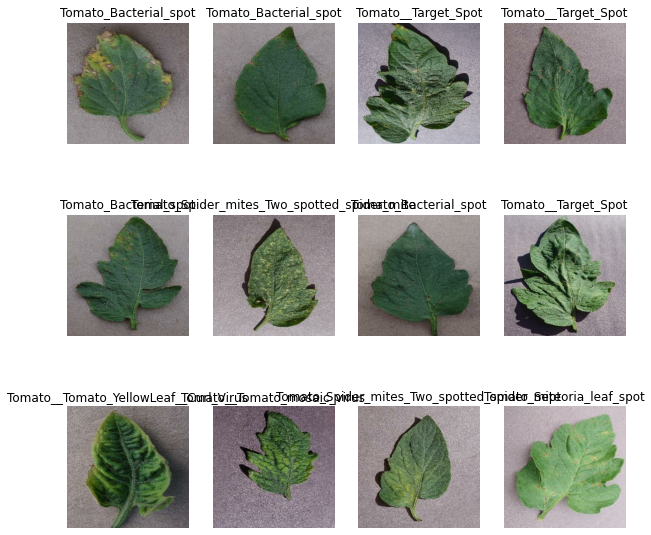

In [5]:
plt.figure(figsize=(10,10))
for image_batch ,label_batch in dataset.take(1):
 for i in range(12):
    ax =plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [6]:
len(dataset)

501

<h3> Function to Split Dataset:</h3>
    
80% ==> training
20% ==> 10% validation
10% test

In [7]:
train_size =0.8
len(dataset)*train_size

400.8

In [9]:
train_ds=dataset.take(400)
len(train_ds)

400

In [10]:
test_ds = dataset.skip(400) 
len(test_ds)

101

In [11]:
val_size=0.1
len(dataset)*val_size

50.1

In [12]:
val_ds = test_ds.take(50)
len(val_ds)

50

In [13]:
test_ds= test_ds.skip(50)
len(test_ds)

51

In [14]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size =len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split*ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds ,val_ds , test_ds


In [15]:
train_ds ,val_ds , test_ds =get_dataset_partitions_tf(dataset)

In [16]:
len(train_ds)

400

In [17]:
len(val_ds)

50

In [18]:
len(test_ds)

51

<h3> Cache, Shuffle, and Prefetch the Dataset </h3>

In [19]:
train_ds =train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds =val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds =test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

<h3> Building the Model </h3>

<h4>Creating a Layer for Resizing and Normalization</h4>

In [20]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

<h4>Data Augmentation </h4>

In [21]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

<h4> Model Architecture </h4>

In [22]:
input_shape= (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes = 10
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size =(3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size =(3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation= 'relu'),
    layers.Dense(n_classes, activation='softmax'),
    
])
model.build(input_shape=input_shape)

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

<h4>Compiling the Model </h4>

In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [24]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
400/400 [==============================] - 973s 2s/step - loss: 1.6581 - accuracy: 0.4098 - val_loss: 1.2745 - val_accuracy: 0.5713
Epoch 2/50
400/400 [==============================] - 752s 2s/step - loss: 1.0218 - accuracy: 0.6478 - val_loss: 1.0686 - val_accuracy: 0.6419
Epoch 3/50
400/400 [==============================] - 601s 2s/step - loss: 0.7512 - accuracy: 0.7347 - val_loss: 0.9850 - val_accuracy: 0.6988
Epoch 4/50
400/400 [==============================] - 617s 2s/step - loss: 0.5446 - accuracy: 0.8080 - val_loss: 0.5826 - val_accuracy: 0.8131
Epoch 5/50
400/400 [==============================] - 602s 2s/step - loss: 0.4506 - accuracy: 0.8386 - val_loss: 0.4321 - val_accuracy: 0.8406
Epoch 6/50
400/400 [==============================] - 598s 1s/step - loss: 0.3566 - accuracy: 0.8699 - val_loss: 0.4324 - val_accuracy: 0.8512
Epoch 7/50
400/400 [==============================] - 600s 2s/step - loss: 0.3391 - accuracy: 0.8795 - val_loss: 0.4149 - val_accuracy: 0.8531

In [25]:
scores = model.evaluate(test_ds)

51/51 [==============================] - 144s 344ms/step - loss: 0.1230 - accuracy: 0.9571


In [26]:
scores

[0.12296991795301437, 0.9571078419685364]

<h4>Plotting the Accuracy and Loss Curves </h4>

In [27]:
history

In [28]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 400}

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
len(history.history['accuracy'])

50

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

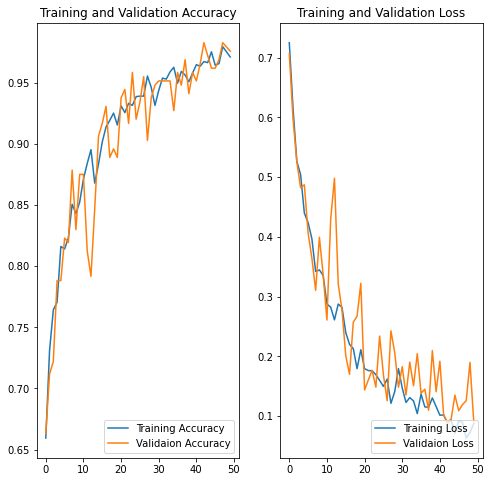

In [41]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validaion Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validaion Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')


<h4> Run prediction on a sample image</h4>

First image to predict
fisrt image actual label: Tomato_Late_blight
predicted label Tomato_Late_blight


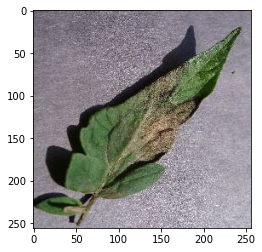

In [32]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image =images_batch[0].numpy().astype('uint8')
    first_label =labels_batch[0].numpy()
                  
    print("First image to predict")
    plt.imshow(first_image)
    print("fisrt image actual label:",class_names[first_label])  
    
    batch_prediction = model.predict(images_batch)
    print("predicted label",class_names[np.argmax(batch_prediction[0])])

In [33]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence


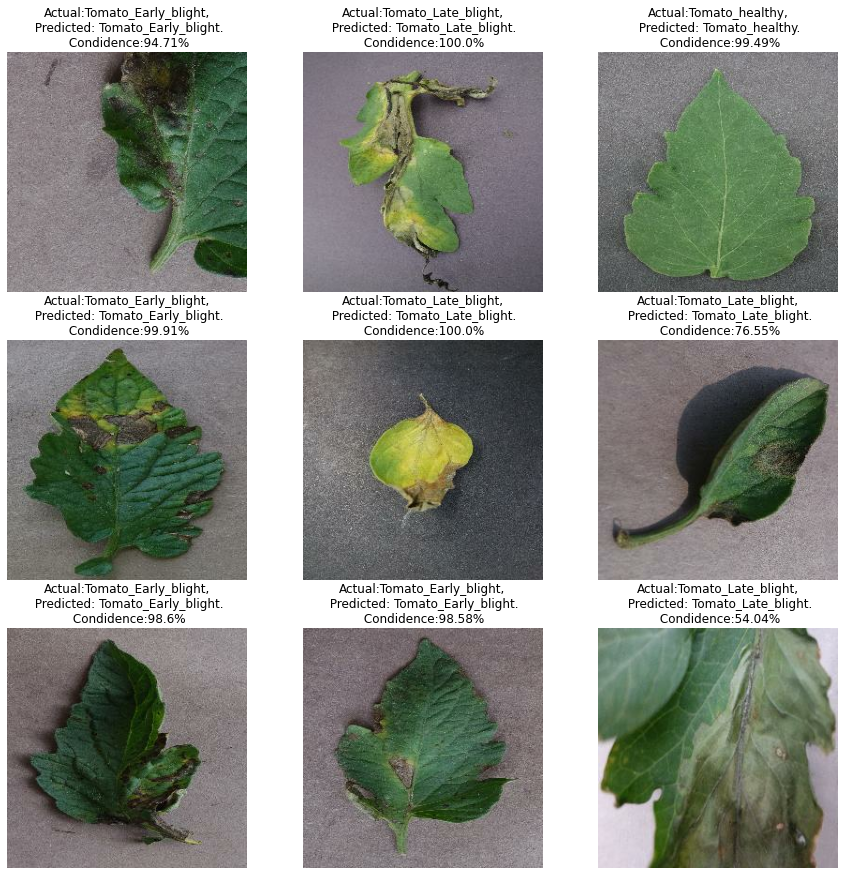

In [85]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax =plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class,confidence =predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class}.\n Condidence:{confidence}%")
        plt.axis('off')

<h4> Save Model</h4>

In [34]:
model = tf.keras.Model()
tf.saved_model.save(model, '../models/')

INFO:tensorflow:Assets written to: ../models/assets
